In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('/Users/mac/Desktop/учеба/проект/raw_set.xlsx')
df = df.drop(columns=['item_id'])
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Кошки,22,False,1,Котенок бесплатно,17,331,44,Котёнок ищет заботливых хозяев🙏🏻. Возраст прим...,NaN,М,4.0,-1,52,5.0,4.2,15,0,0
49996,Собаки,25,False,1,Среднеазиатская овчарка алабай,30,72,11,"Хороший, добрый кобель, не агрессивный, послуш...",NaN,М,0.0,1,58,0.0,0.0,543,16,17
49997,Кошки,25,False,3,Кошка в дар,11,294,43,Василий 😻❤️🫶Васенька 🥰\nВот такой шикарный кот...,NaN,Ж,2.5,0,35,1.0,5.0,15,2,2
49998,Собаки,7,False,3,"Маленькая Молли 1,5 года",24,405,61,"Маленькая Молли 1,5 года ищет свою семью! Молл...",NaN,Ж,18.0,0,36,2.0,5.0,5,0,2


In [2]:
def outlier(df, col):
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    df_new = df.drop(df[(df[col] < lower) | (df[col] > higher)].index, inplace=True)
    return df_new

# Работа с каждым столбцом

In [52]:
df[['page_views', 'favorites', 'contacts']].describe()

,page_views,favorites,contacts
count,50000.000000,50000.000000,50000.000000
mean,137.963400,7.051620,2.472020
std,393.870037,23.194765,7.503475
min,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000
50%,34.000000,1.000000,0.000000
75%,119.000000,6.000000,2.000000
max,24336.000000,1406.000000,264.000000


## Вид животного

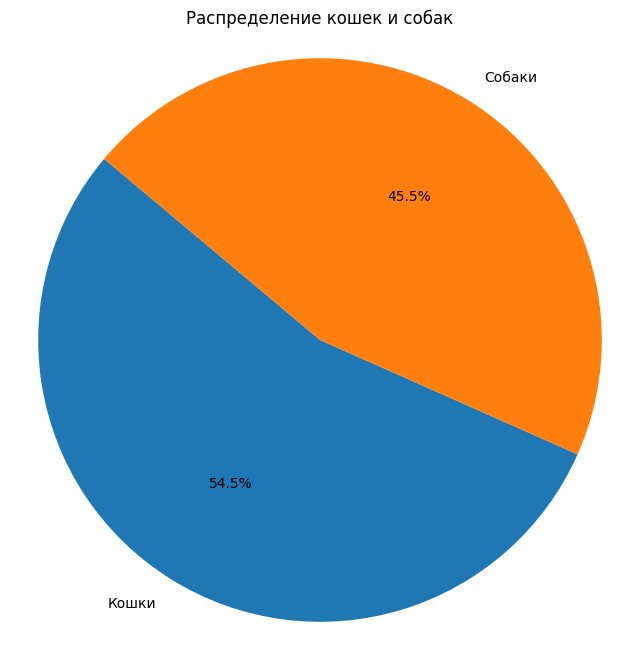

In [53]:
cat_counts = df['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение кошек и собак')
plt.axis('equal')
plt.show()

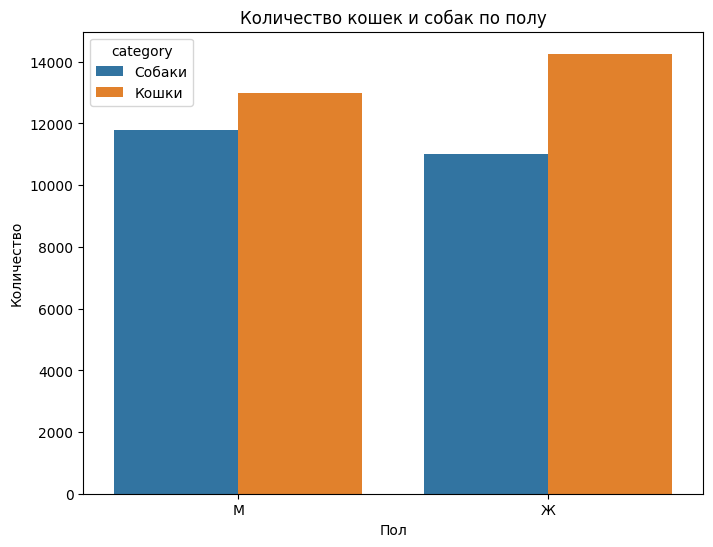

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='category', data=df)
plt.title('Количество кошек и собак по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Активность объявления

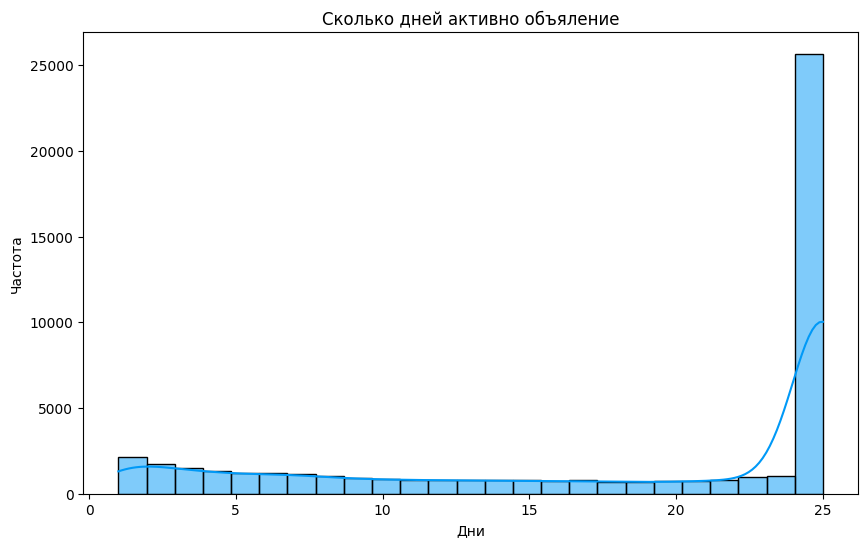

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['days_active'], bins=len(np.unique(df['days_active'])), kde=True, color='#0099F7')
plt.title('Сколько дней активно объяление')
plt.xlabel('Дни')
plt.ylabel('Частота')
plt.show()

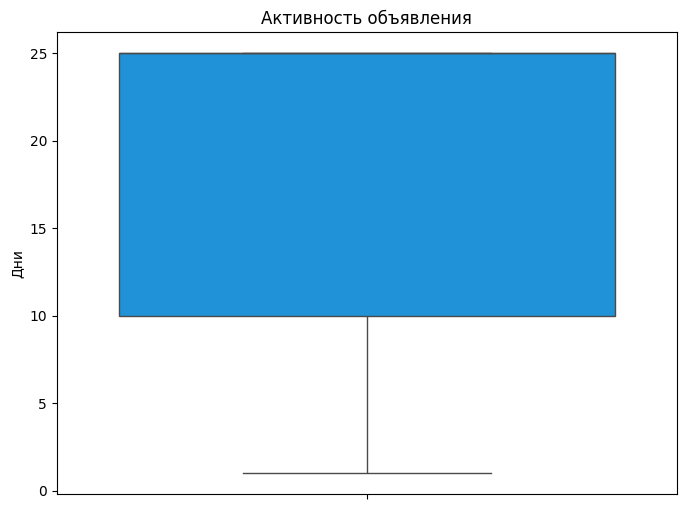

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['days_active'], color='#0099F7')
plt.title('Активность объявления')
plt.ylabel('Дни')
plt.show()

In [57]:
df['days_active'].unique()

array([ 5, 25, 18, 14, 17, 24,  4, 23, 13,  9,  8,  1, 16,  7, 21, 10, 12,
        3, 20,  2,  6, 11, 22, 15, 19])

## Есть ли видео

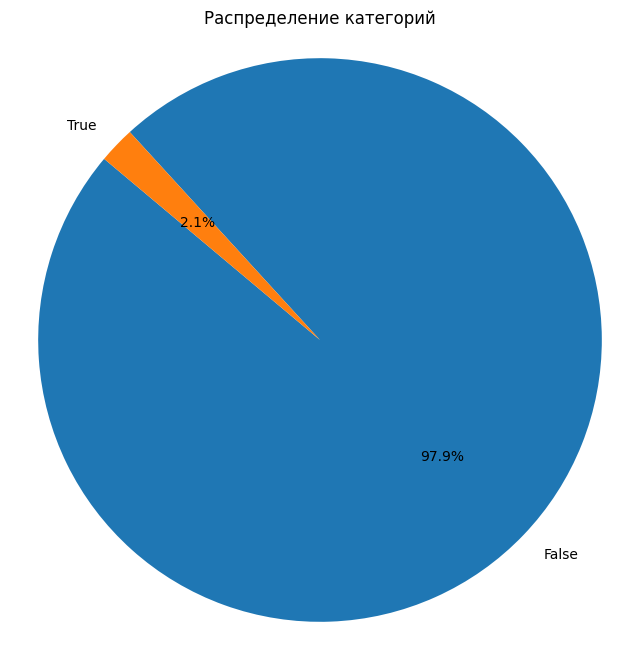

In [58]:
counts = df['has_video'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение категорий')
plt.axis('equal')
plt.show()

## Количество фото

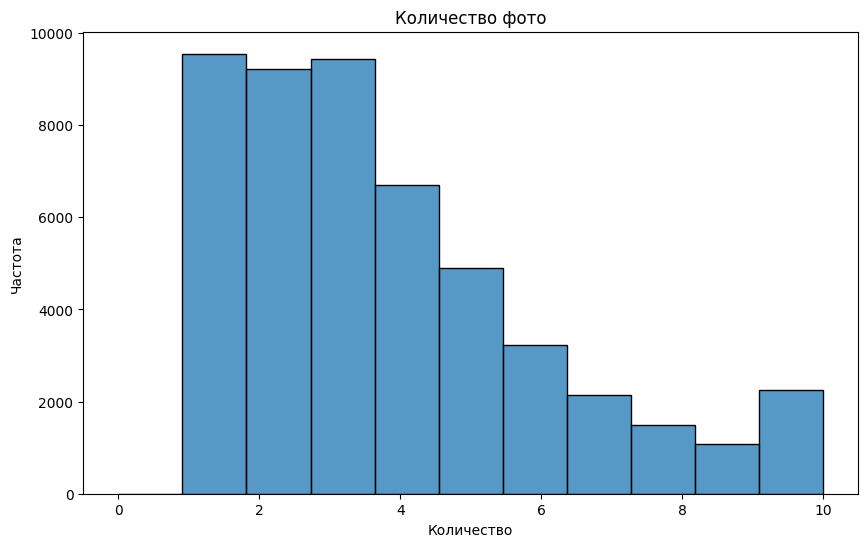

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['photo_count'], bins=11)
plt.title('Количество фото')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

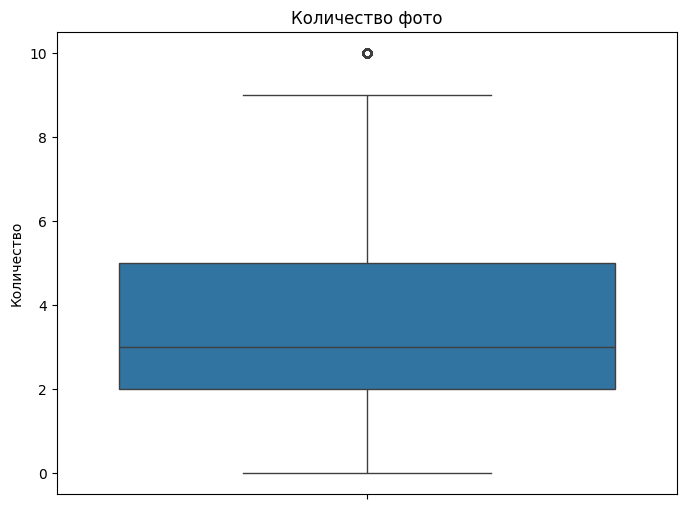

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['photo_count'])
plt.title('Количество фото')
plt.ylabel('Количество')
plt.show()

## Длина заголовка

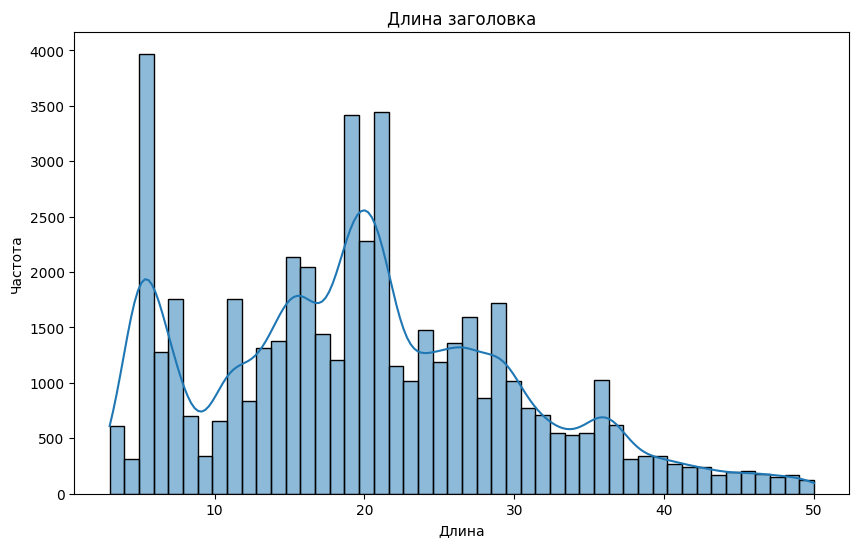

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=48)
plt.title('Длина заголовка')
plt.xlabel('Длина')
plt.ylabel('Частота')
plt.show()

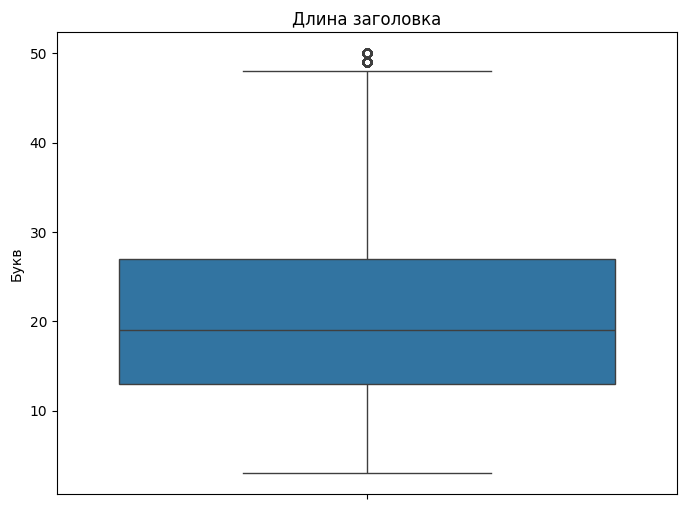

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['title_length'])
plt.title('Длина заголовка')
plt.ylabel('Букв')
plt.show()

## Длина описания

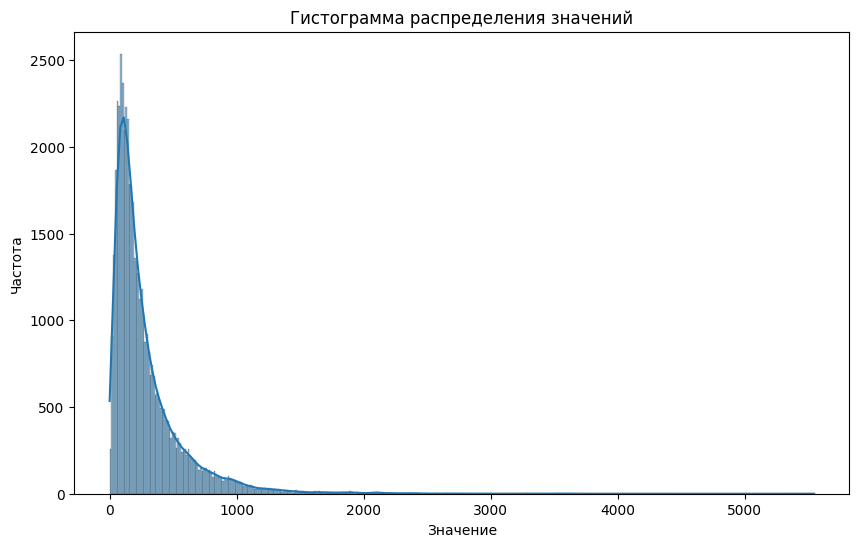

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], kde=True)
plt.title('Гистограмма распределения значений')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

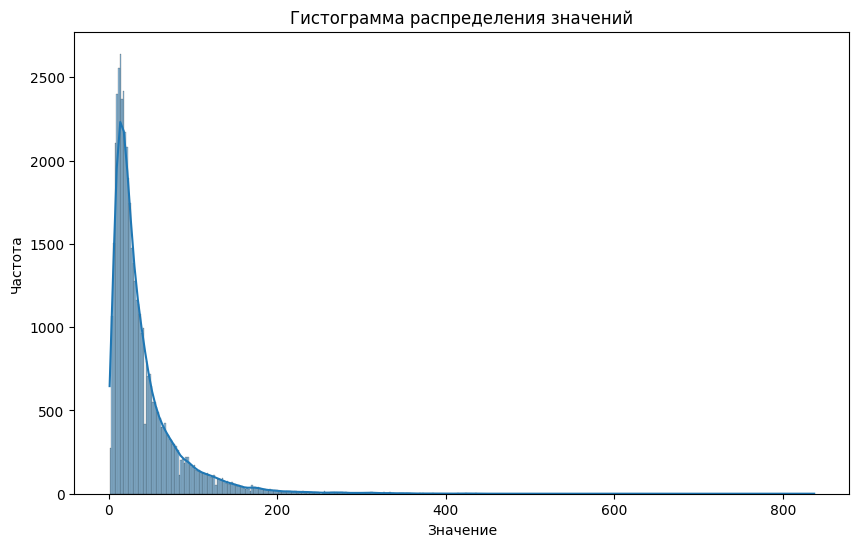

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['description_word_count'], kde=True)
plt.title('Гистограмма распределения значений')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

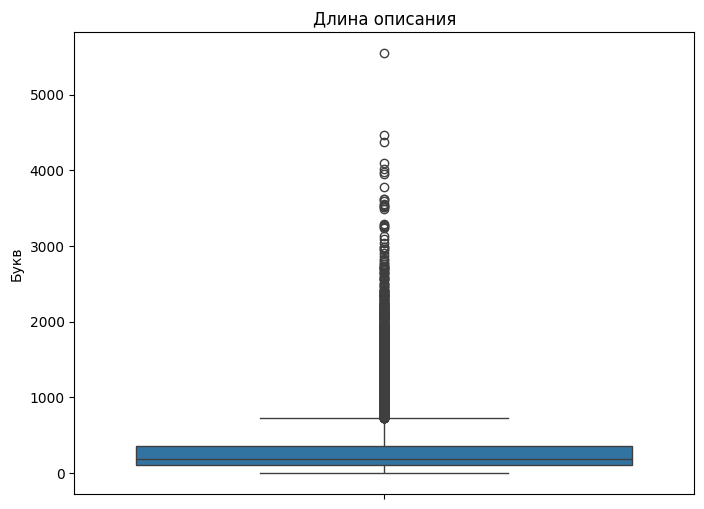

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['description_length'])
plt.title('Длина описания')
plt.ylabel('Букв')
plt.show()

------------



In [66]:
df_cat = df[df['category'] == 'Кошки']
df_dog = df[df['category'] == 'Собаки']

## Породы

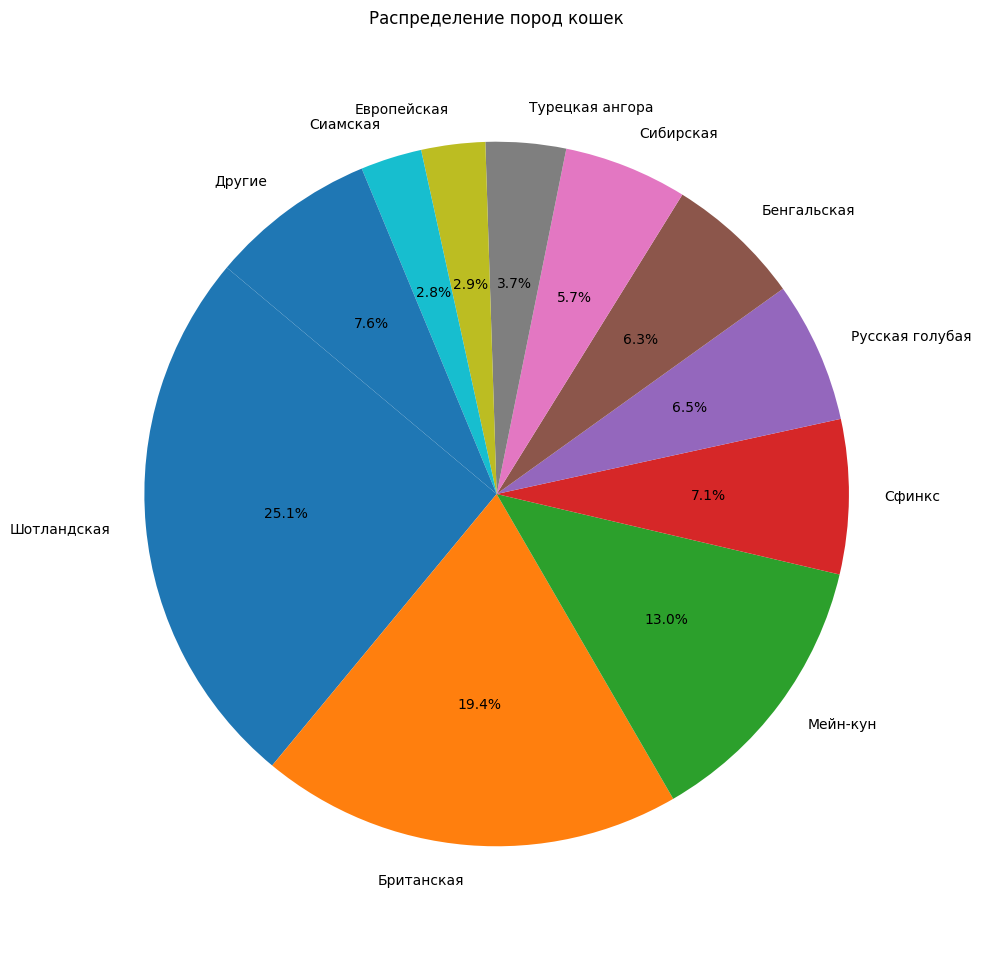

In [67]:
counts = df_cat['breed'].value_counts()

top_10 = counts.nlargest(10)

others = counts.drop(top_10.index).sum()
top_10['Другие'] = others

plt.figure(figsize=(10, 12))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пород кошек')
plt.axis('equal')
plt.show()

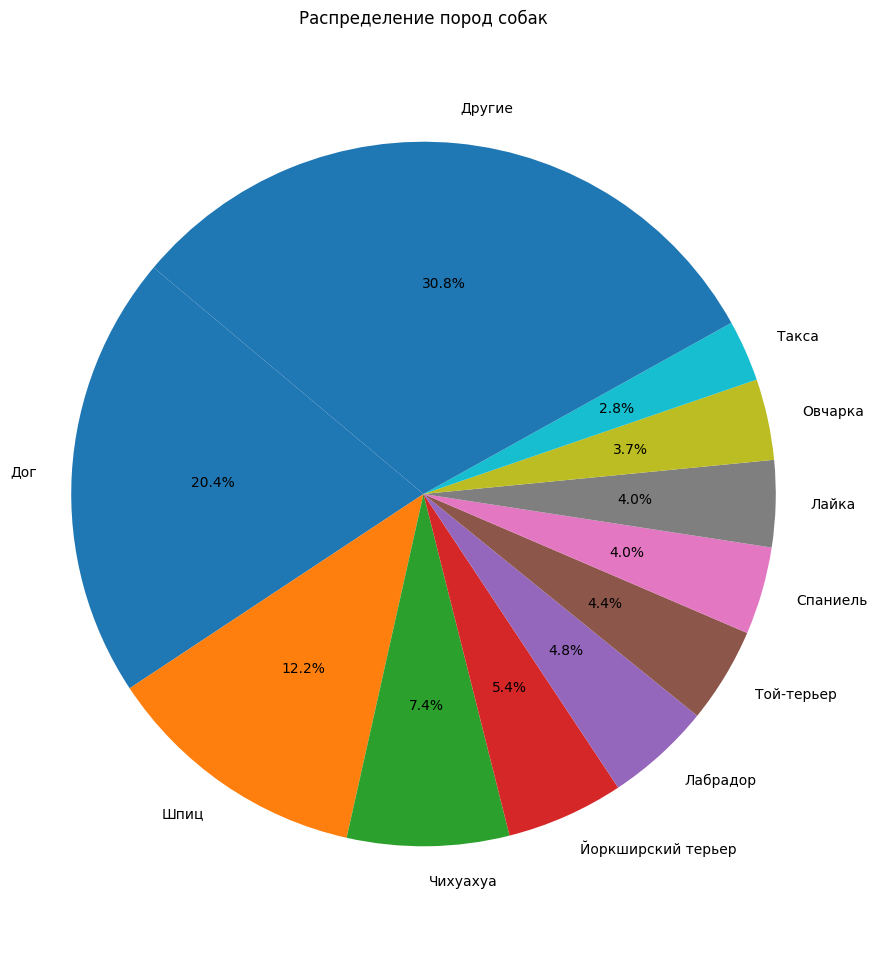

In [68]:
counts = df_dog['breed'].value_counts()

top_10 = counts.nlargest(10)

others = counts.drop(top_10.index).sum()
top_10['Другие'] = others

plt.figure(figsize=(10, 12))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пород собак')
plt.axis('equal')
plt.show()

## Пол

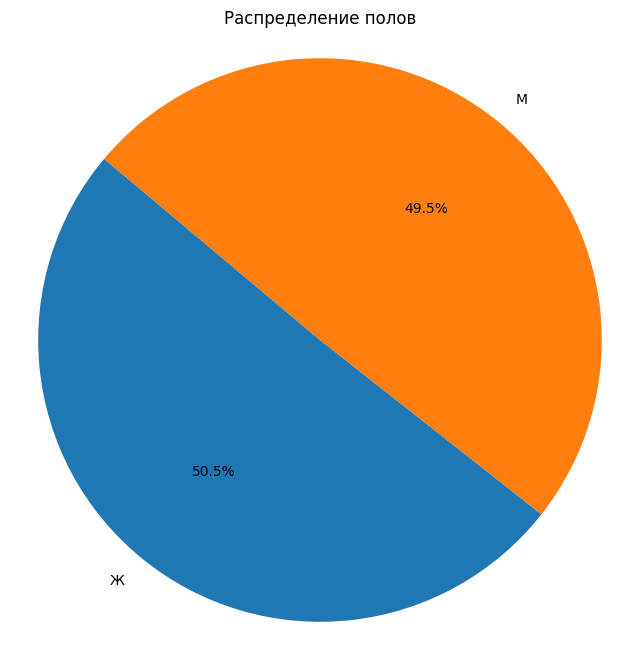

In [69]:
counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение полов')
plt.axis('equal')
plt.show()

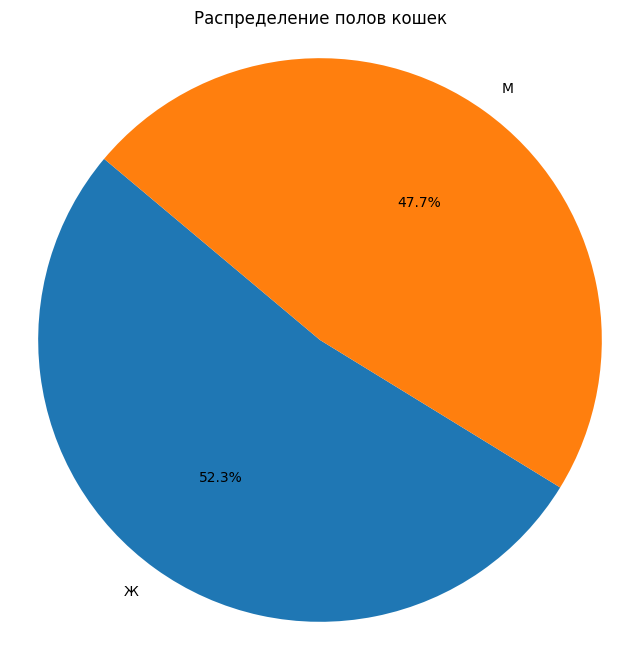

In [70]:
counts = df_cat['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение полов кошек')
plt.axis('equal')
plt.show()

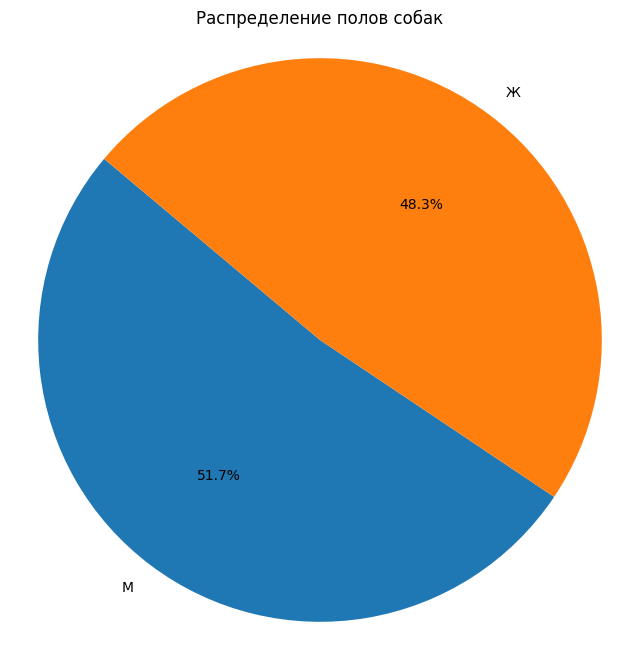

In [71]:
counts = df_dog['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение полов собак')
plt.axis('equal')
plt.show()

## Возраст

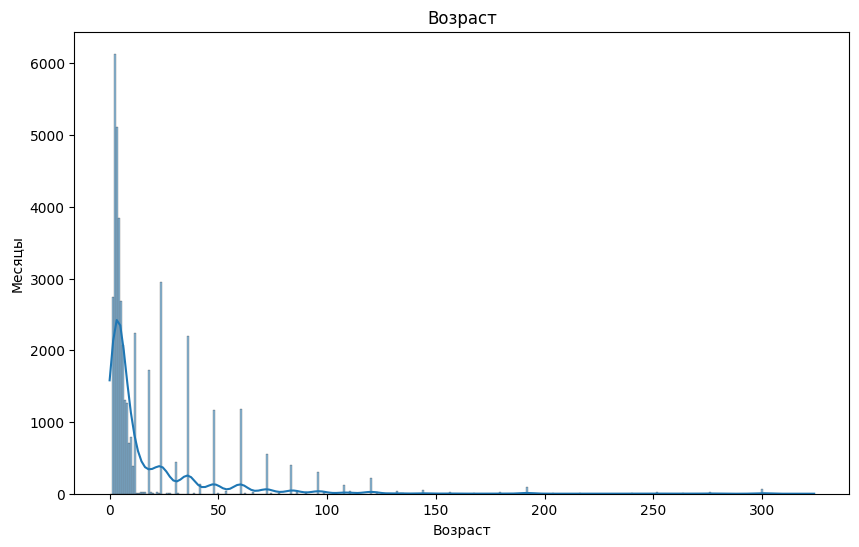

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Возраст')
plt.xlabel('Возраст')
plt.ylabel('Месяцы')
plt.show()

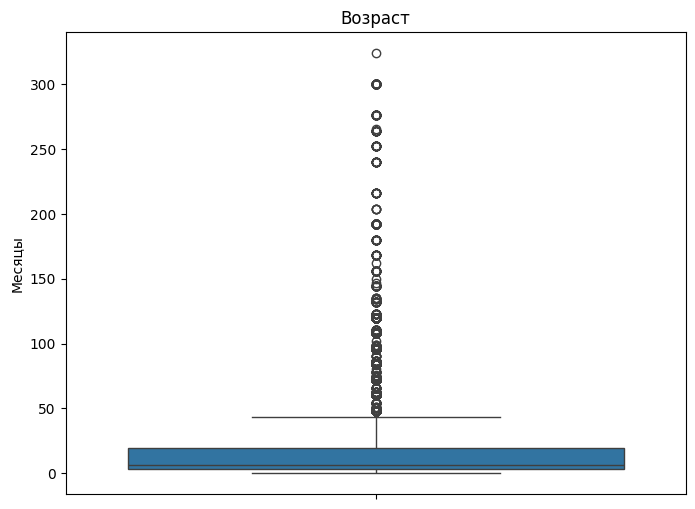

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.title('Возраст')
plt.ylabel('Месяцы')
plt.show()

In [74]:
df['years'] = round(df['age'] / 12, 2)
df.head(5)

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites,years
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0,9.00
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17,NaN
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1,5.00
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1,0.58
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5,3.00


In [75]:
df['years'].isna().sum()

8508

## Цена

In [76]:
df_priced = df[df['price'] > 0]


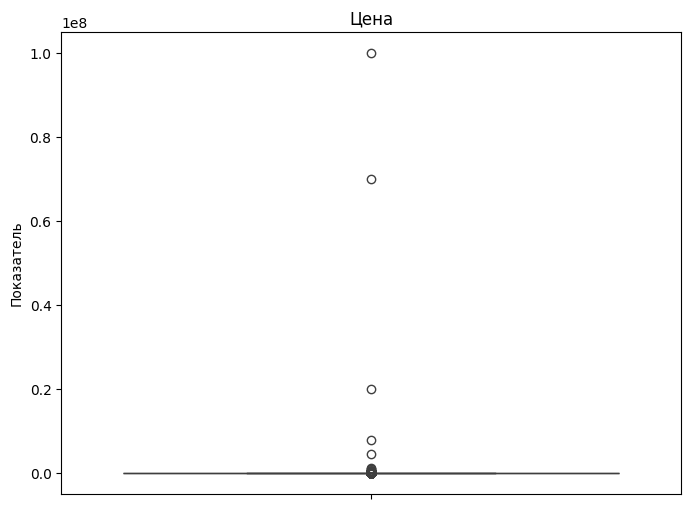

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_priced['price'])
plt.title('Цена')
plt.ylabel('Показатель')
plt.show()

## Продавец

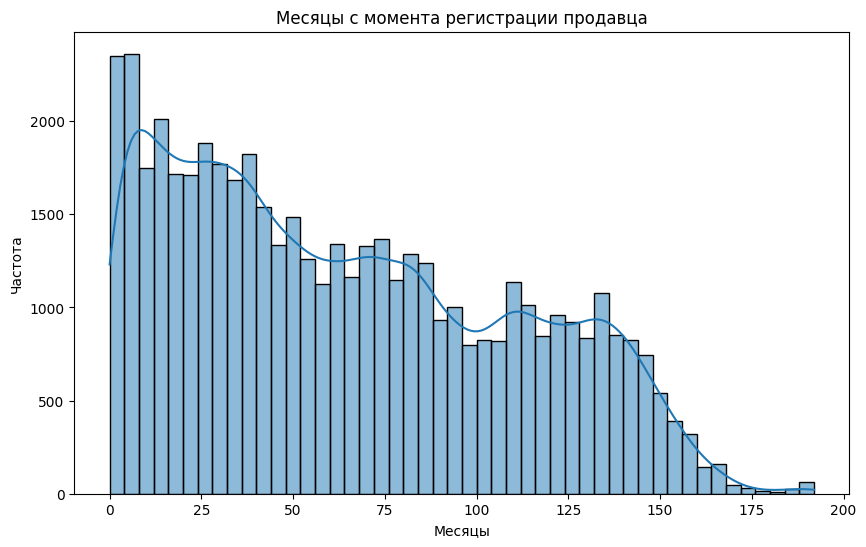

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['seller_n_month'], kde=True)
plt.title('Месяцы с момента регистрации продавца')
plt.xlabel('Месяцы')
plt.ylabel('Частота')
plt.show()

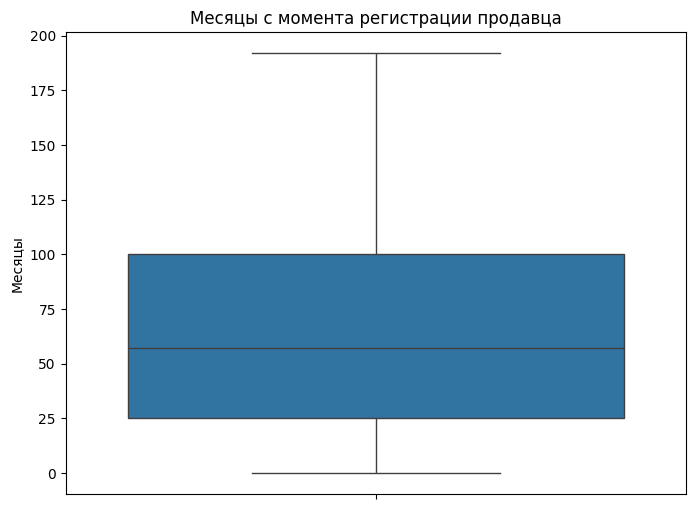

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['seller_n_month'])
plt.title('Месяцы с момента регистрации продавца')
plt.ylabel('Месяцы')
plt.show()

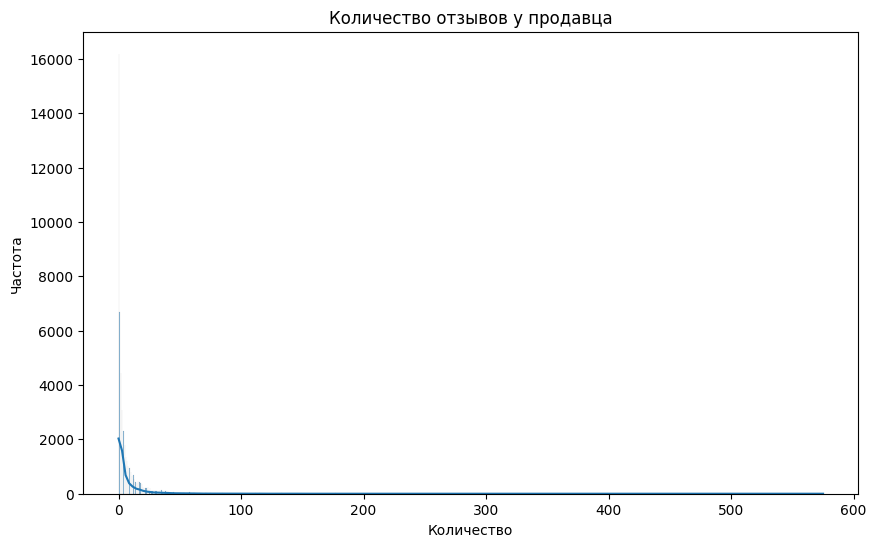

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(df['seller_count_reviews'], kde=True)
plt.title('Количество отзывов у продавца')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

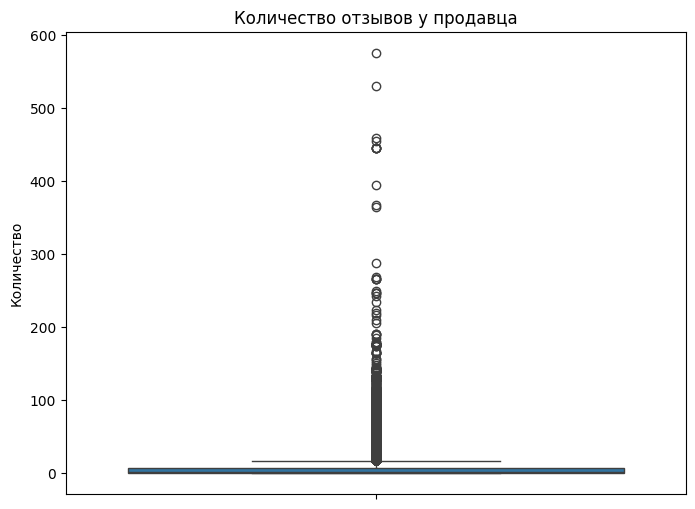

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['seller_count_reviews'])
plt.title('Количество отзывов у продавца')
plt.ylabel('Количество')
plt.show()

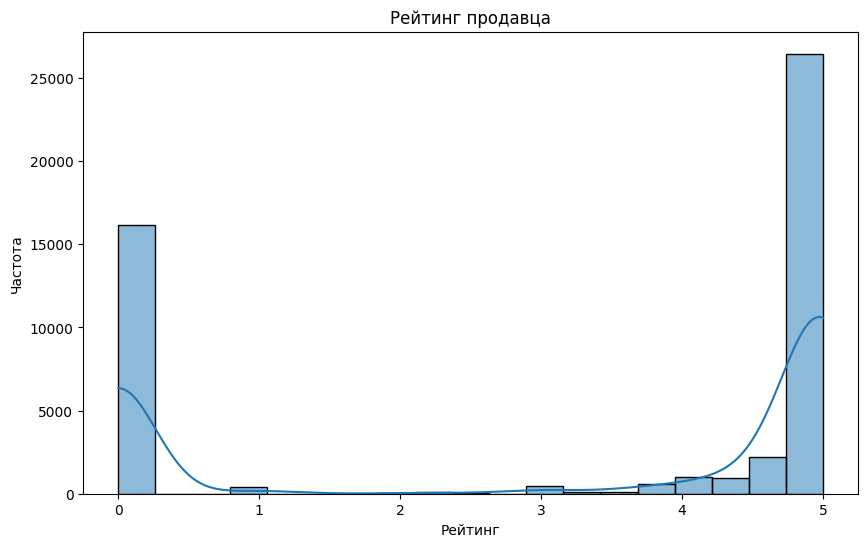

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df['seller_rating'], kde=True)
plt.title('Рейтинг продавца')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

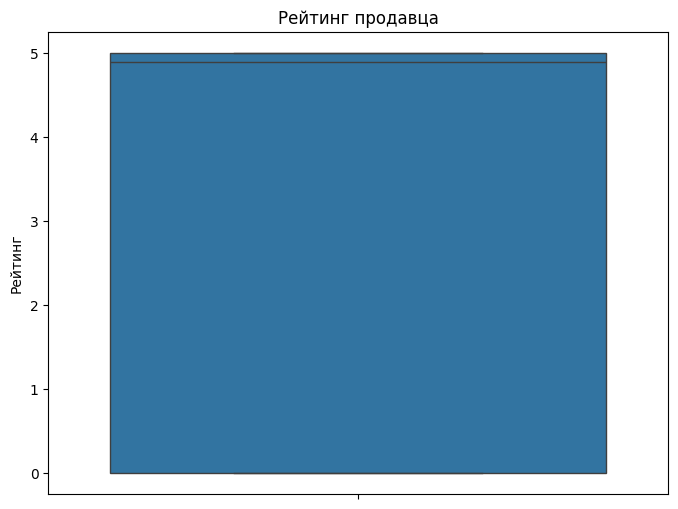

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['seller_rating'])
plt.title('Рейтинг продавца')
plt.ylabel('Рейтинг')
plt.show()

## Метрики успешности

In [84]:
df[['page_views', 'favorites', 'contacts']].describe()

,page_views,favorites,contacts
count,50000.000000,50000.000000,50000.000000
mean,137.963400,7.051620,2.472020
std,393.870037,23.194765,7.503475
min,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000
50%,34.000000,1.000000,0.000000
75%,119.000000,6.000000,2.000000
max,24336.000000,1406.000000,264.000000


In [85]:
outlier(df, 'page_views')
outlier(df, 'favorites')
outlier(df, 'contacts')


,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites,years
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0,9.00
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1,5.00
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1,0.58
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5,3.00
5,Собаки,25,False,6,Собака в добрые руки щенок,26,812,111,В деревне Кузовино случилась большая беда! Две...,Овчарка,М,NaN,0,14,0.0,0.0,68,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Собаки,25,False,4,Собака в добрые руки,20,234,35,Отдадим в добрые руки песика по кличке Атос.\n...,NaN,М,36.0,0,89,10.0,5.0,8,2,0,3.00
49995,Кошки,22,False,1,Котенок бесплатно,17,331,44,Котёнок ищет заботливых хозяев🙏🏻. Возраст прим...,NaN,М,4.0,-1,52,5.0,4.2,15,0,0,0.33
49997,Кошки,25,False,3,Кошка в дар,11,294,43,Василий 😻❤️🫶Васенька 🥰\nВот такой шикарный кот...,NaN,Ж,2.5,0,35,1.0,5.0,15,2,2,0.21
49998,Собаки,7,False,3,"Маленькая Молли 1,5 года",24,405,61,"Маленькая Молли 1,5 года ищет свою семью! Молл...",NaN,Ж,18.0,0,36,2.0,5.0,5,0,2,1.50


In [86]:
df[['page_views', 'favorites', 'contacts']].describe()

,page_views,favorites,contacts
count,41994.000000,41994.000000,41994.000000
mean,49.726985,2.156880,0.613707
std,66.079076,3.071158,1.020397
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,24.000000,1.000000,0.000000
75%,62.000000,3.000000,1.000000
max,443.000000,16.000000,4.000000


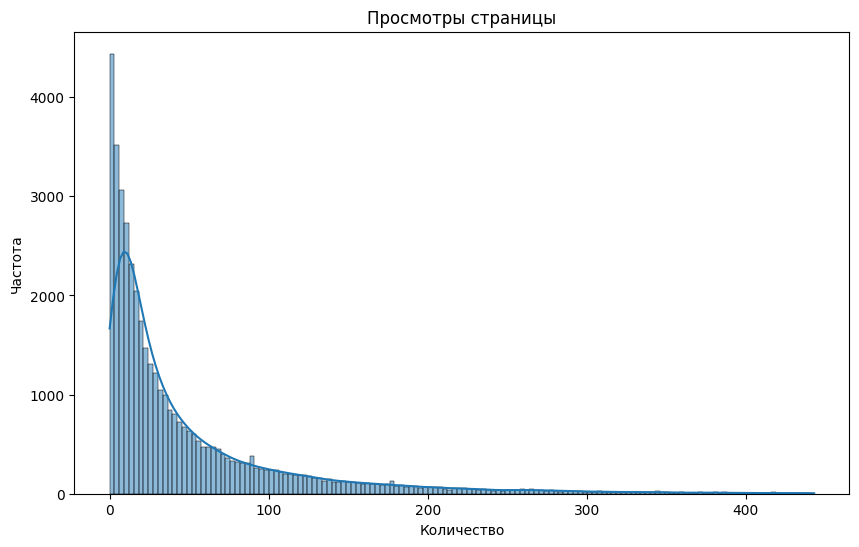

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['page_views'], kde=True)
plt.title('Просмотры страницы')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

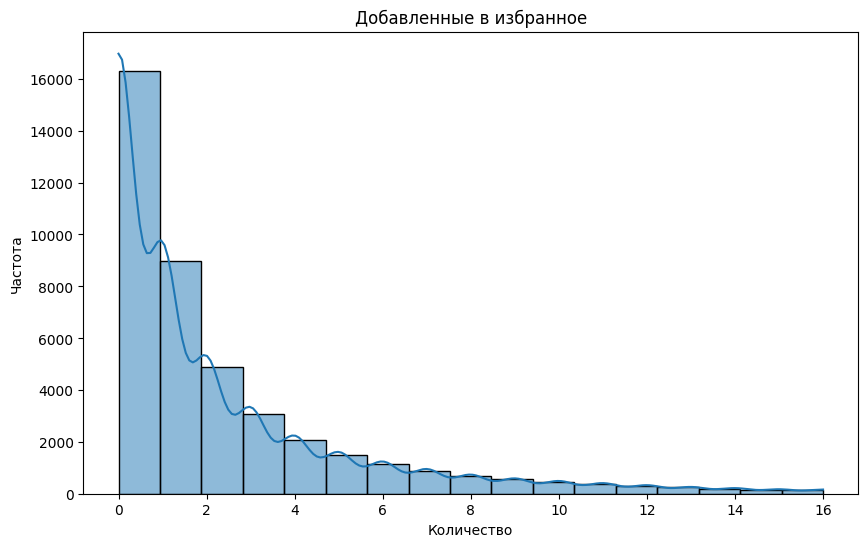

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['favorites'], kde=True, bins=17)
plt.title('Добавленные в избранное')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

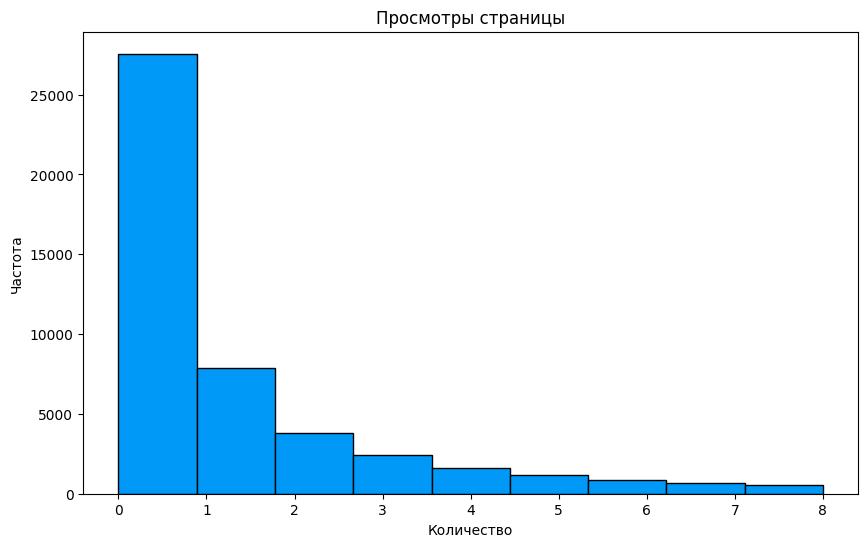

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['contacts'], bins=9,color='#0099f7', alpha=1)
plt.title('Просмотры страницы')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

In [4]:
outlier(df, 'contacts')

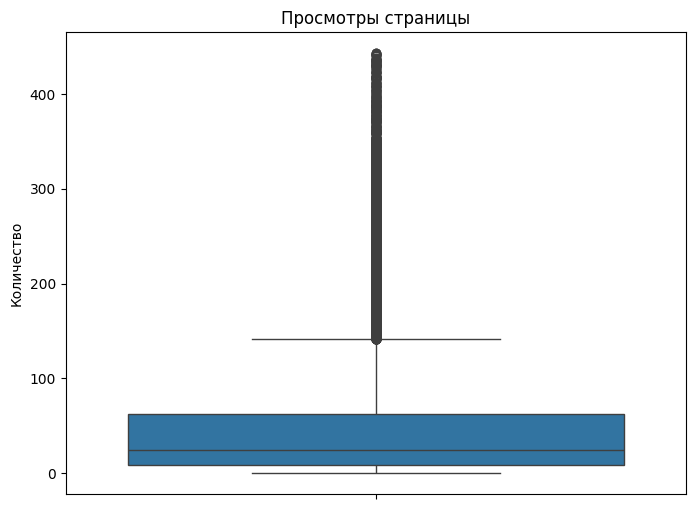

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['page_views'])
plt.title('Просмотры страницы')
plt.ylabel('Количество')
plt.show()

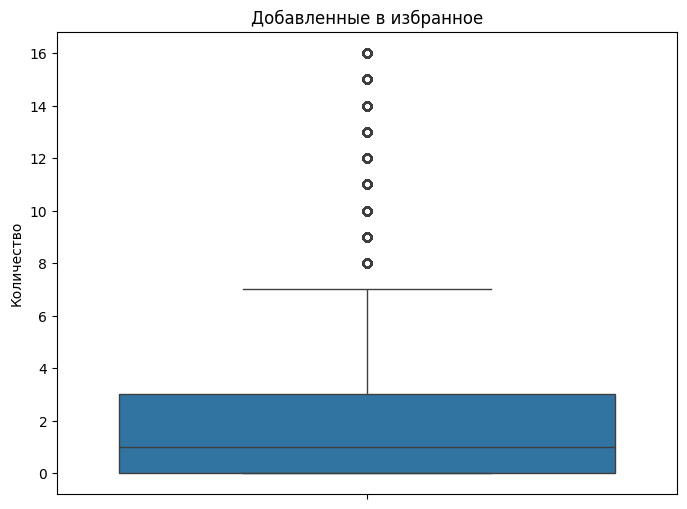

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['favorites'])
plt.title('Добавленные в избранное')
plt.ylabel('Количество')
plt.show()

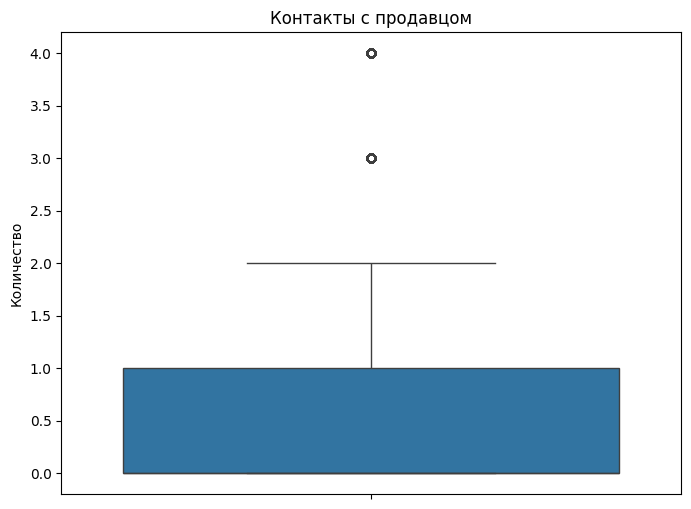

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['contacts'])
plt.title('Контакты с продавцом')
plt.ylabel('Количество')
plt.show()

# Работа с несколькими столбцами

In [120]:
df.isnull().sum()

category                      0
days_active                   0
has_video                     0
photo_count                   0
title                         0
title_length                  0
description_length            0
description_word_count        0
DescriptionRu                 0
breed                     30987
gender                        0
age                        5676
price                         0
seller_n_month                0
seller_count_reviews       1047
seller_rating              1133
page_views                    0
contacts                      0
favorites                     0
years                      5676
dtype: int64

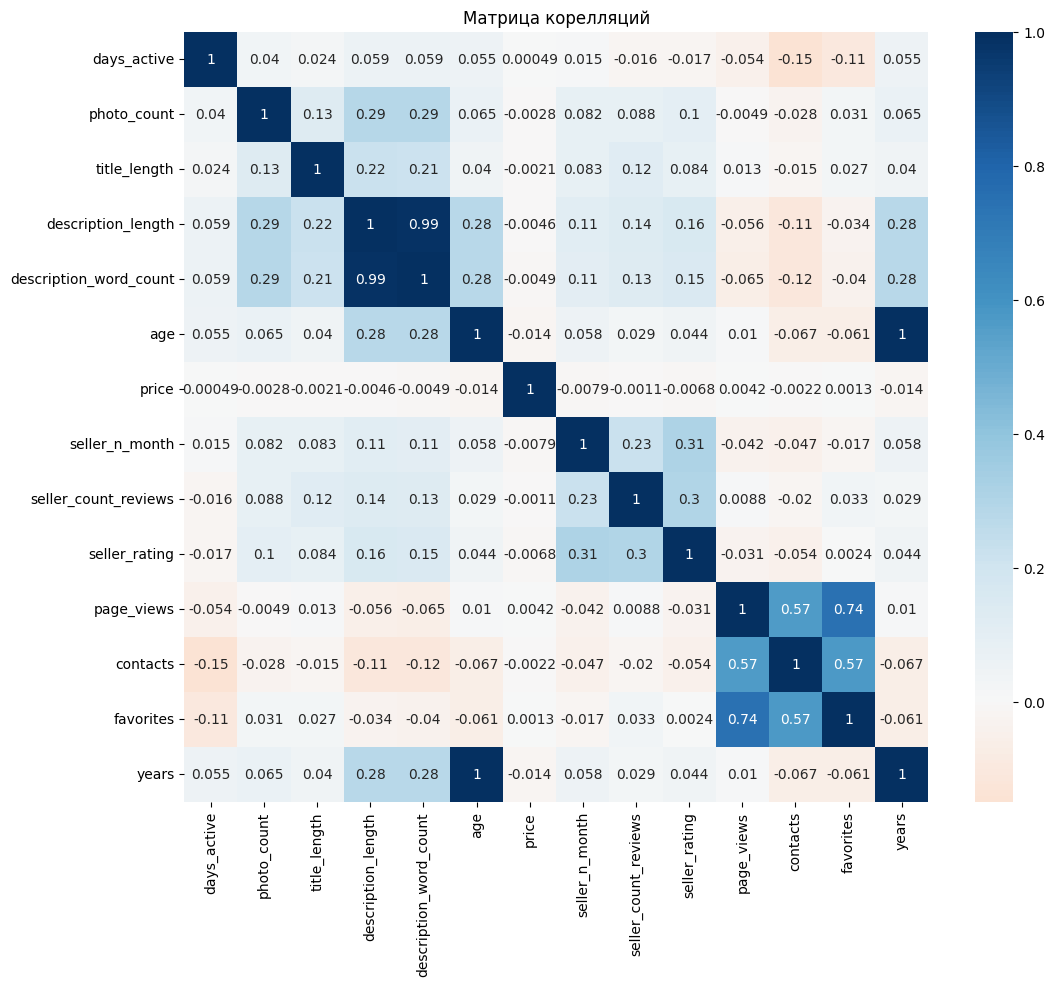

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])


sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu', center=0)
plt.title('Матрица корелляций')
plt.show()

## Scatterplots

In [122]:
outlier(df_numeric, 'age')


,days_active,photo_count,title_length,description_length,description_word_count,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites,years
2,25,4,10,354,55,60.0,1,99,0.0,0.0,13,0,1,5.00
3,25,1,17,869,123,7.0,1,142,2.0,5.0,36,0,1,0.58
4,18,4,10,30,6,36.0,0,4,0.0,0.0,33,0,5,3.00
5,25,6,26,812,111,NaN,0,14,0.0,0.0,68,2,3,NaN
6,25,2,43,86,17,NaN,-1,15,0.0,0.0,171,2,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,25,4,20,234,35,36.0,0,89,10.0,5.0,8,2,0,3.00
49995,22,1,17,331,44,4.0,-1,52,5.0,4.2,15,0,0,0.33
49997,25,3,11,294,43,2.5,0,35,1.0,5.0,15,2,2,0.21
49998,7,3,24,405,61,18.0,0,36,2.0,5.0,5,0,2,1.50


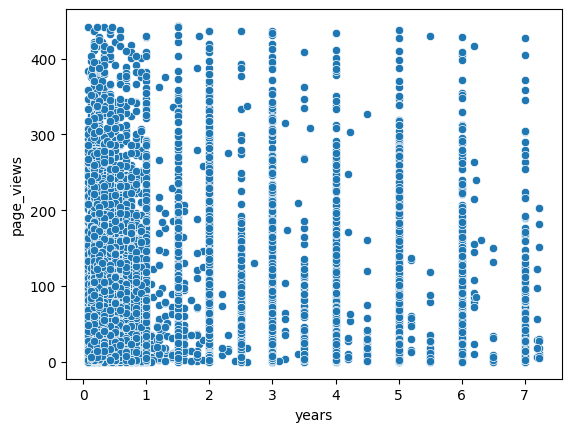

In [123]:
sns.scatterplot(x='years', y='page_views', data=df_numeric)


plt.show()

In [3]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,Кошки,5,False,4,Кот 2 года ко всему приучен,27,22,4,Кот не пакостит совсем,NaN,...,4.0,5.0,270,54.000000,5,20,0.02,0.25,0.07,-0.894136
1,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198
2,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
3,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
4,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
49969,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
49970,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
49971,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089


In [9]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric

,days_active,photo_count,title_length,description_length,description_word_count,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,5,4,18,1155,184,108.0,0,35,1.0,5.0,0,0,0
1,25,2,20,49,7,NaN,-1,68,4.0,4.8,484,10,17
2,25,4,10,354,55,60.0,1,99,0.0,0.0,13,0,1
3,25,1,17,869,123,7.0,1,142,2.0,5.0,36,0,1
4,18,4,10,30,6,36.0,0,4,0.0,0.0,33,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,22,1,17,331,44,4.0,-1,52,5.0,4.2,15,0,0
49996,25,1,30,72,11,0.0,1,58,0.0,0.0,543,16,17
49997,25,3,11,294,43,2.5,0,35,1.0,5.0,15,2,2
49998,7,3,24,405,61,18.0,0,36,2.0,5.0,5,0,2


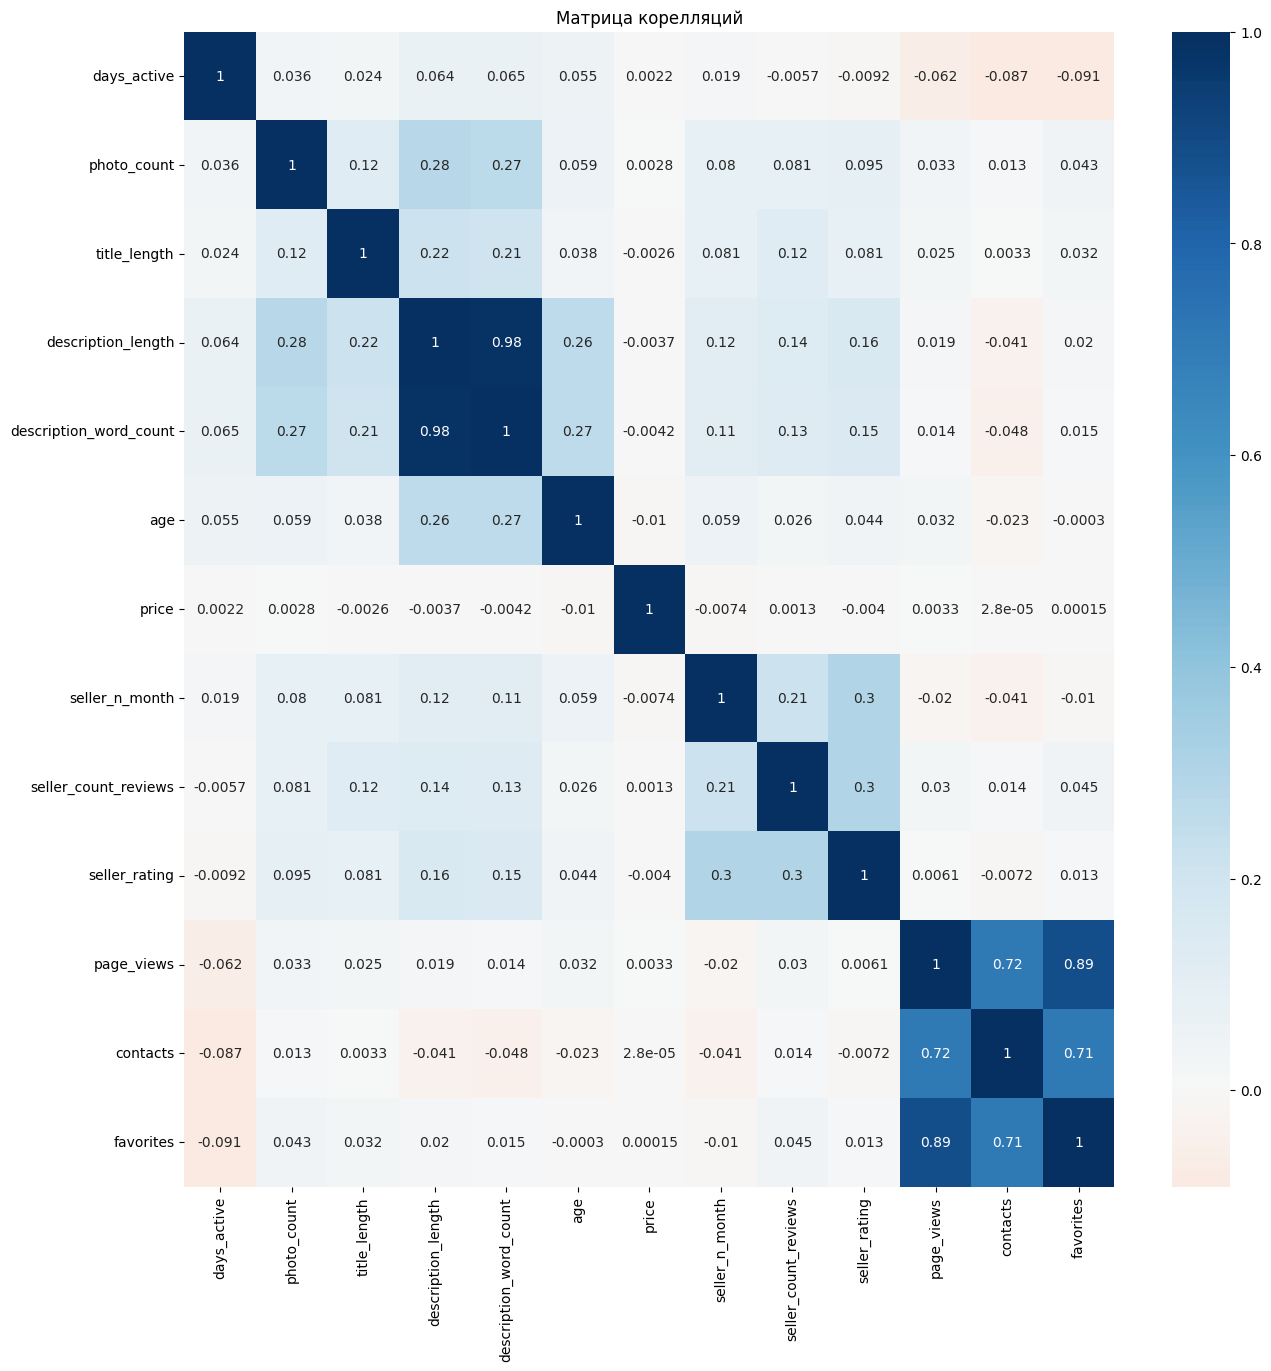

In [10]:
plt.figure(figsize=(15, 15))

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu', center=0)
plt.title('Матрица корелляций')
plt.show()

In [ ]:
df_numeric = df[['days_active', 'photo_count', 'title_length', 'description_length', 'age', 'page_views', 'contacts', 'favorites']]


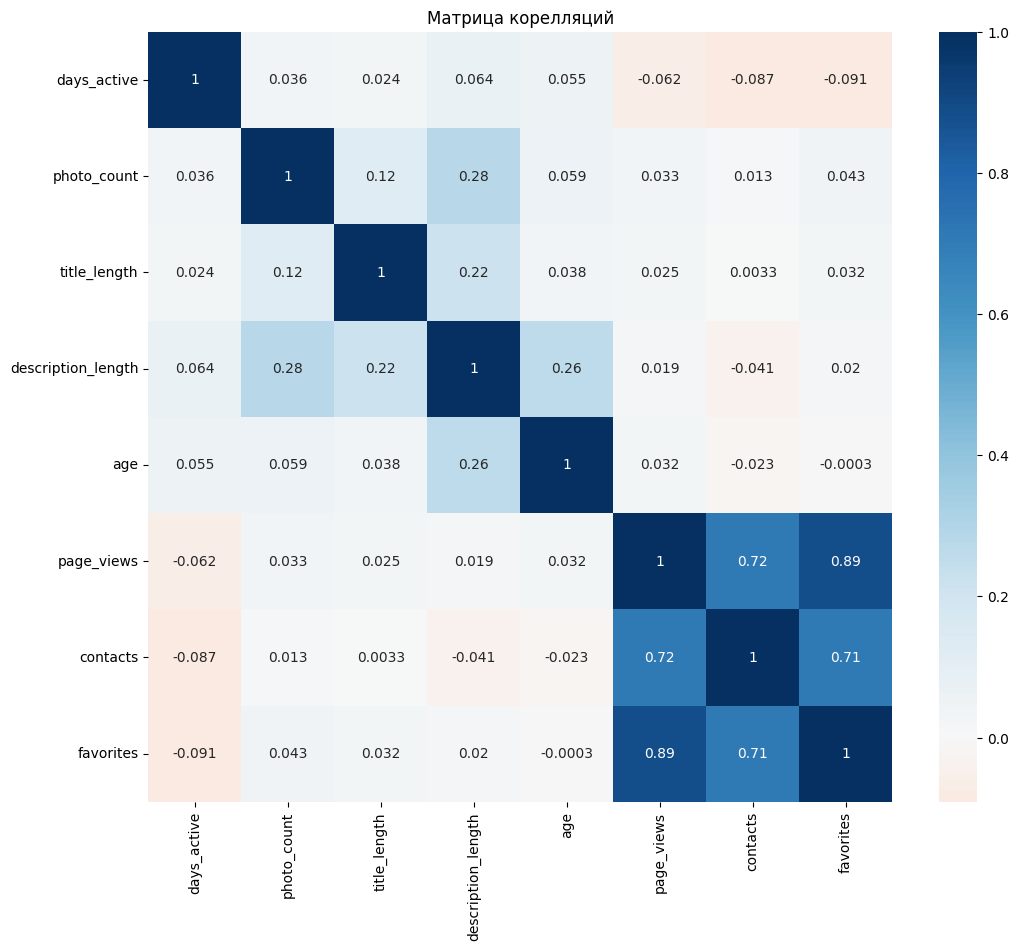

In [13]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu', center=0)
plt.title('Матрица корелляций')
plt.show()